$k(i, j, m) = 10 \cdot \dfrac{e^{-\|i - j\|^2}}{2 l^2} \cdot \dfrac{e^{-\| i - m\|^2}}{2t^2} \cdot \dfrac{e^{-\| j - m\|^2}}{2t^2}$

In [47]:
import numpy as np
from matplotlib import pyplot as plt

N = 100
grid = np.arange(N)
m = 20

t = 10
l = 20

def kernel(i, j, m):
    return 10 * np.exp(-(i - j) **2 / (2 * l **2)) \
        * np.exp(-(i - m) **2 / (2 * t **2)) * np.exp(-(j - m) **2 / (2 * t **2))
K = np.zeros((N, N))
for i in np.arange(N):
    for j in np.arange(N):
        K[i, j] = kernel(float(i), float(j), m)
K = K + 1e-8 * np.eye(N)

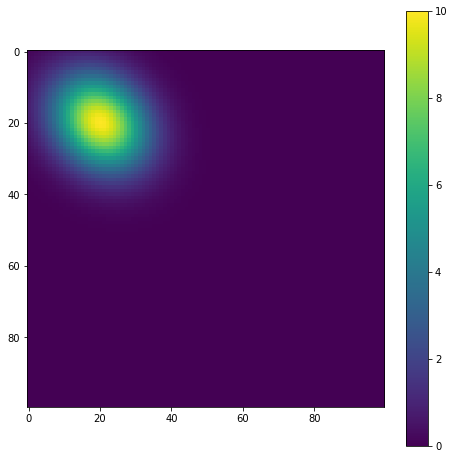

In [48]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(K.T)
plt.colorbar()

In [4]:
L = np.linalg.cholesky(K)

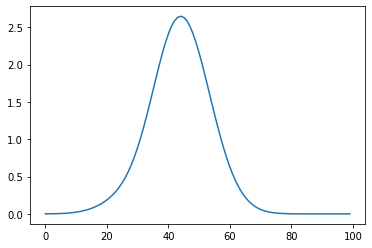

In [5]:
w = L @ np.random.randn(N)
plt.plot(w)

In [6]:
K_eig, K_ev = np.linalg.eigh(K)

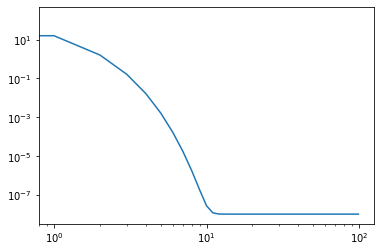

In [7]:
plt.loglog(np.flip(K_eig))

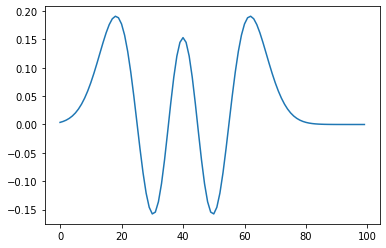

In [8]:
plt.plot(K_ev[:, -5])

The eigenfunction of the covariance function of a GP measures the amount of uncertainty (variance) the GP puts along that direction.  

Stationary covariance between $X_s$ and $X_t $means that the covariance depends only on the difference 
between $t - s$ and not in the values of $t$ and $s$ themselves.

(100, 100)

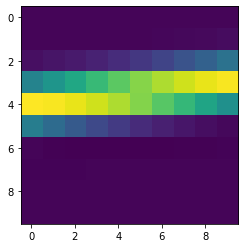

In [10]:
n = 10
A = np.random.multivariate_normal(np.zeros(n ** 2), K, 50)
fig = plt.figure()
plt.imshow(A[0].reshape(10, 10))

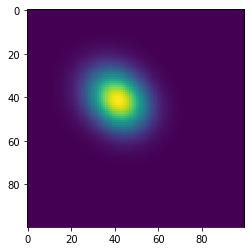

In [11]:
fig = plt.figure()
plt.imshow(np.dot(A.T, A))

Genrate 2D features based on this non-stationary covariance matrix.

In [185]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

n = np.arange(10)
yy, xx = np.meshgrid(n, n)
grid = np.column_stack((xx.flatten(), yy.flatten()))
N = len(grid)

def kernel(i, j, m):
    return 10 * np.exp(-la.norm(i - j) **2 / (2 * l **2)) \
        * np.exp(-la.norm(i - m) **2 / (2 * t **2)) * np.exp(-la.norm(j - m) **2 / (2 * t **2))
K = np.zeros((N, N))

m = [30, 20]
l = 80
t = 80

for i in range(N):
    for j in range(N):
        K[i, j] = kernel(grid[i], grid[j], m)                                                      

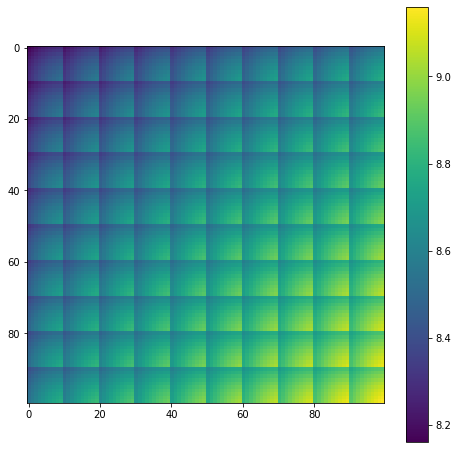

In [186]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(K.T)
plt.colorbar()

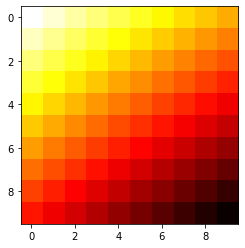

In [190]:
A = np.random.multivariate_normal(np.zeros(N), K, 5)
fig = plt.figure()
plt.imshow(A[0].reshape(10, 10), cmap='hot')